<a href="https://colab.research.google.com/github/C110156215/PyrhonExam/blob/main/drowsiness_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 建立卷積神經網絡（CNN）模型:

In [ ]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#! cp "/content/drive/My Drive/archive (1).zip" /content/
#! cp "/content/drive/My Drive/archive (2).zip" /content/

In [ ]:
labels = os.listdir("/content/train")

In [ ]:
labels

['Open', 'Closed', 'no_yawn', 'yawn']

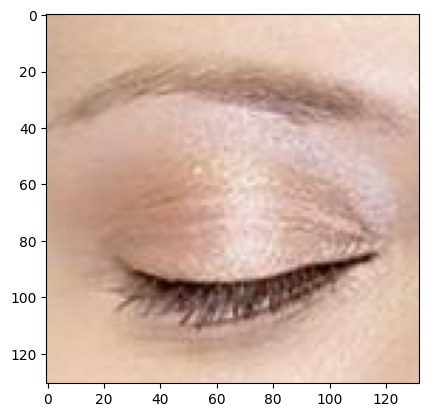

In [ ]:
plt.imshow(plt.imread("/content/train/Closed/_2.jpg"))

In [ ]:
a = plt.imread("/content/train/yawn/10.jpg")

In [ ]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

In [ ]:
a.shape

(480, 640, 3)

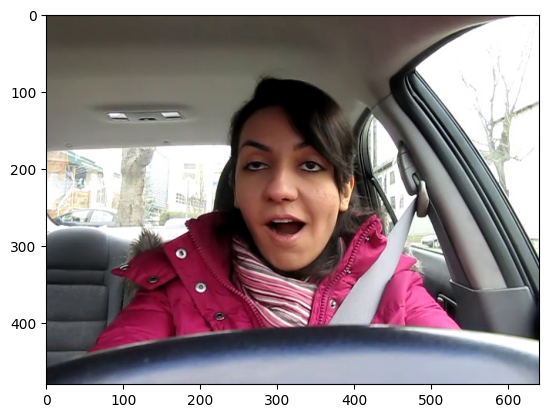

In [ ]:
plt.imshow(plt.imread("/content/train/yawn/5.jpg"))

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [ ]:
train_data = train_data_gen.flow_from_directory("/content/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [ ]:
validation_data = train_data_gen.flow_from_directory("/content/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data = test_data_gen.flow_from_directory("/content/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [ ]:
train_data

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
model.build(input_shape=(80, 80, 3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)        

In [ ]:
validation_steps = len(test_data)
validation_steps

363

In [ ]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
291/291 [==============================] - 28s 90ms/step - loss: 0.9584 - accuracy: 0.5321 - val_loss: 0.4237 - val_accuracy: 0.7928
Epoch 2/55
291/291 [==============================] - 26s 89ms/step - loss: 0.4210 - accuracy: 0.7859 - val_loss: 0.3864 - val_accuracy: 0.8200
Epoch 3/55
291/291 [==============================] - 25s 87ms/step - loss: 0.3650 - accuracy: 0.8238 - val_loss: 0.3604 - val_accuracy: 0.8066
Epoch 4/55
291/291 [==============================] - 25s 87ms/step - loss: 0.3348 - accuracy: 0.8376 - val_loss: 0.3437 - val_accuracy: 0.8121
Epoch 5/55
291/291 [==============================] - 25s 86ms/step - loss: 0.3189 - accuracy: 0.8522 - val_loss: 0.3322 - val_accuracy: 0.8445
Epoch 6/55
291/291 [==============================] - 32s 111ms/step - loss: 0.2932 - accuracy: 0.8682 - val_loss: 0.3873 - val_accuracy: 0.8486
Epoch 7/55
291/291 [==============================] - 25s 87ms/step - loss: 0.2605 - accuracy: 0.8811 - val_loss: 0.3190 - val_accuracy

In [ ]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

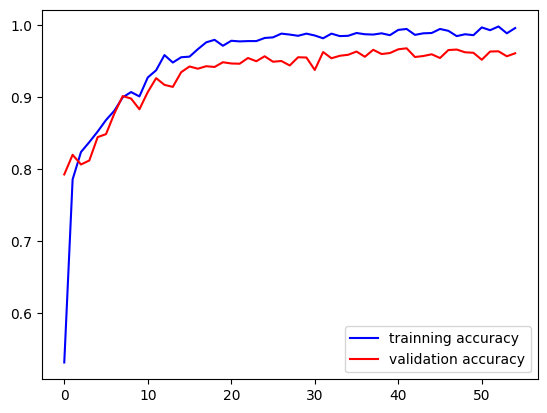

In [ ]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

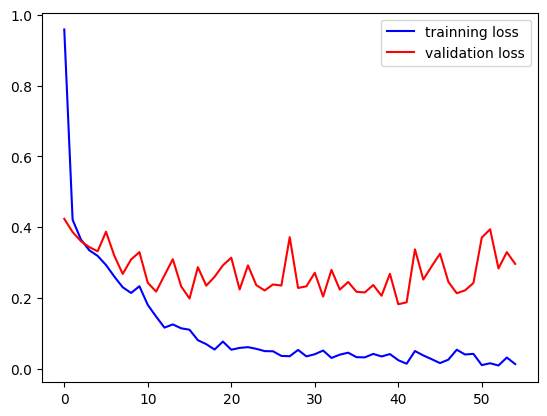

In [ ]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model.save("drowiness.h5")

In [ ]:
model.save("drowiness.model")

# 檢測睡意 主程式

In [ ]:
#pip install pillow

In [1]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [2]:
model = load_model('drowiness.h5')

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)        

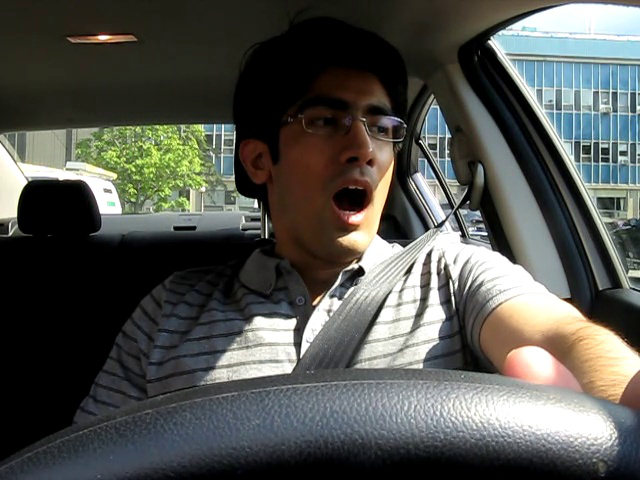

In [38]:
imgurl="/content/testpic2.jpg"
Image.open(imgurl)

In [39]:
image_size = (80, 80)

In [40]:
img = Image.open(imgurl).resize(image_size)

In [41]:
img = np.array(img)/255.0

In [42]:
img.shape

(80, 80, 3)

In [43]:
result = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 19ms/step


In [44]:
result.shape

(1, 4)

In [45]:
result

array([[1.2775820e-21, 6.6793244e-16, 5.5638359e-11, 1.0000000e+00]],
      dtype=float32)

In [46]:
predicted_label_index = np.argmax(result)

In [47]:
if (predicted_label_index==0):
    print('偵測到閉眼')
    
elif predicted_label_index==1:
    print('沒有打哈欠')
    
elif predicted_label_index==2:
    print('睜眼')
    
elif predicted_label_index==3:
    print('打哈欠')

打哈欠


In [48]:
if (predicted_label_index==0) | (predicted_label_index==3):
    print('疲勞駕駛')

elif (predicted_label_index==1) | (predicted_label_index==2):
    print('無疲勞駕駛')

疲勞駕駛
